# Setup

In [1]:
import sys
import os

# Adiciona a pasta src ao path para importar nossos scripts
sys.path.append(os.path.abspath("../src"))

from data_loader import load_olist_data
from preprocessing import preprocess_data
from visualization import generate_visualizations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Ambiente configurado com sucesso.")

/home/eduardo/data_science_projects/olist/ecommerce_sales_predictor/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ambiente configurado com sucesso.


In [2]:
# Carga e Integração de Dados

# Executa o pipeline de ingestão e pré-processamento
datasets = load_olist_data()
df = preprocess_data(datasets)

# Visualização da estrutura relacional integrada
print(f"Dataset mestre carregado: {df.shape[0]} registros.")
df.head()

Iniciando download/checagem do dataset via kagglehub...
olist_customers_dataset.csv carregado com sucesso.
olist_order_items_dataset.csv carregado com sucesso.
olist_order_payments_dataset.csv carregado com sucesso.
olist_order_reviews_dataset.csv carregado com sucesso.
olist_orders_dataset.csv carregado com sucesso.
olist_products_dataset.csv carregado com sucesso.
olist_sellers_dataset.csv carregado com sucesso.
product_category_name_translation.csv carregado com sucesso.
Iniciando pre-processamento...
Pre-processamento concluido. Dataset mestre gerado com 110836 linhas.
Dataset mestre carregado: 110836 registros.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_year_month,periodo_analise,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2017-10,Expansao (2017),1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,2018-07,Estagnacao (2018),1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,2018-08,Estagnacao (2018),1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,2017-11,Expansao (2017),1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,2018-02,Estagnacao (2018),1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,5.0


# Análise de Sazonalidade - Q1

## Q1: Tendência Histórica e Sazonalidade

### Como as vendas se comportaram entre 2016 e 2018 e quais os meses de maior pico? 

### Hipótese: Esperamos observar picos significativos em períodos promocionais (Black Friday).

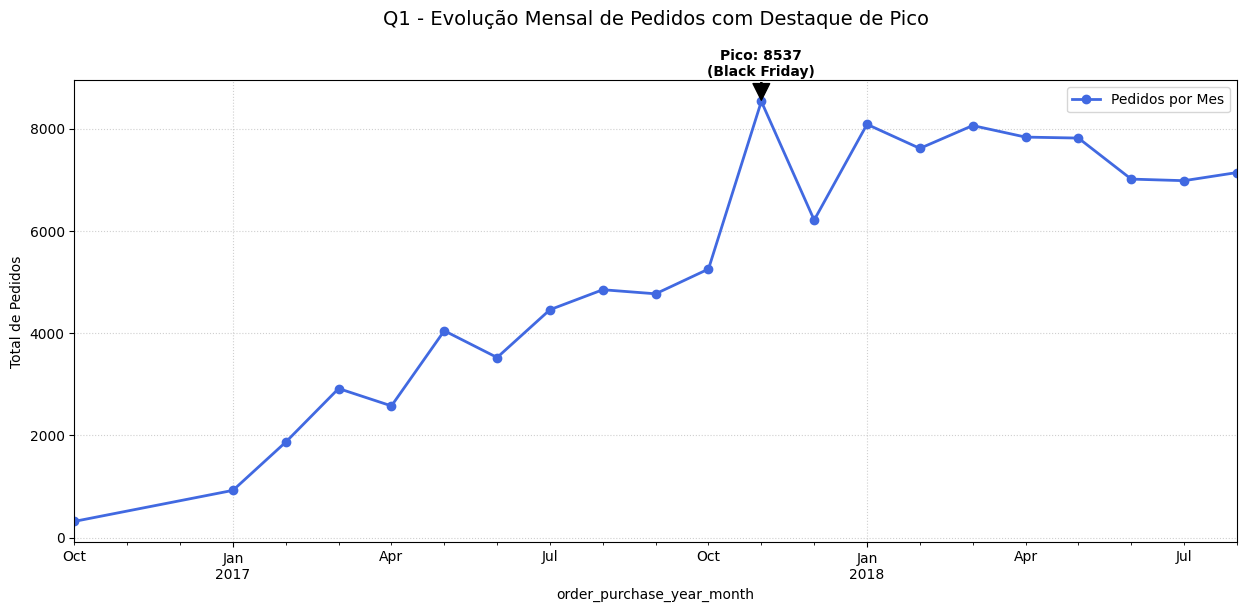

In [3]:
# Analise de Sazonalidade com Media e Indicador de Pico
plt.figure(figsize=(15, 6))

# Calculo da serie
vendas_mensais = df.groupby('order_purchase_year_month').size()
#media_vendas = vendas_mensais.mean()
max_vendas = vendas_mensais.max()
mes_pico = vendas_mensais.idxmax()

# Plotagem principal
vendas_mensais.plot(kind='line', marker='o', color='royalblue', linewidth=2, label='Pedidos por Mes')

# Linha da Media
#plt.axhline(y=media_vendas, color='red', linestyle='--', alpha=0.7, label=f'Media: {media_vendas:.2f}')

# Indicador de Pico (Novembro)
plt.annotate(f'Pico: {max_vendas}\n(Black Friday)', 
             xy=(mes_pico.to_timestamp(), max_vendas), 
             xytext=(mes_pico.to_timestamp(), max_vendas + 500),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             horizontalalignment='center',
             fontsize=10, fontweight='bold')

plt.title('Q1 - Evolução Mensal de Pedidos com Destaque de Pico', fontsize=14, pad=40)
plt.ylabel('Total de Pedidos')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [4]:
serie_temporal = df.groupby('order_purchase_year_month').size().to_frame(name='total_pedidos')
serie_temporal['variacao_pct'] = serie_temporal['total_pedidos'].pct_change() * 100

In [5]:
# Calculo do Desvio Padrao e Identificacao de Meses Atipicos

# 1. Calculando as metricas basicas
media = serie_temporal['total_pedidos'].mean()
desvio_padrao = serie_temporal['total_pedidos'].std()

limite_superior = media + desvio_padrao
limite_inferior = media - desvio_padrao

# 2. Filtrando os meses
meses_acima = serie_temporal[serie_temporal['total_pedidos'] > limite_superior]
meses_abaixo = serie_temporal[serie_temporal['total_pedidos'] < limite_inferior]

print(f"Media de pedidos: {media:.2f}")
print(f"Desvio Padrao: {desvio_padrao:.2f}")
print(f"Limite Superior (Media + 1DP): {limite_superior:.2f}")
print(f"Limite Inferior (Media - 1DP): {limite_inferior:.2f}")

print("\n--- Meses ACIMA do Desvio Padrao (Picos de Demanda) ---")
print(meses_acima)

print("\n--- Meses ABAIXO do Desvio Padrao (Inicio de Operacao ou Baixa) ---")
print(meses_abaixo)

Media de pedidos: 5277.90
Desvio Padrao: 2537.82
Limite Superior (Media + 1DP): 7815.73
Limite Inferior (Media - 1DP): 2740.08

--- Meses ACIMA do Desvio Padrao (Picos de Demanda) ---
                           total_pedidos  variacao_pct
order_purchase_year_month                             
2017-11                             8537     62.423896
2018-01                             8088     30.157708
2018-03                             8064      5.868452
2018-04                             7838     -2.802579
2018-05                             7819     -0.242409

--- Meses ABAIXO do Desvio Padrao (Inicio de Operacao ou Baixa) ---
                           total_pedidos  variacao_pct
order_purchase_year_month                             
2016-10                              317           NaN
2017-01                              924    191.482650
2017-02                             1869    102.272727
2017-04                             2577    -11.655811


In [6]:
# Volatilidade

# Isolando os anos de interesse (removendo outliers de inicio/fim)o
variacao_2017 = serie_temporal.loc['2017-02':'2017-12', 'variacao_pct']
variacao_2018 = serie_temporal.loc['2018-02':'2018-08', 'variacao_pct']

print("--- Analise de Volatilidade (MoM) ---")
print(f"Variacao Maxima em 2017: {variacao_2017.max():.2f}%")
print(f"Variacao Minima em 2017: {variacao_2017.min():.2f}%")
print(f"Amplitude (2017): {variacao_2017.max() - variacao_2017.min():.2f} pontos percentuais")

print(f"\nVariacao Maxima em 2018: {variacao_2018.max():.2f}%")
print(f"Variacao Minima em 2018: {variacao_2018.min():.2f}%")
print(f"Amplitude (2018): {variacao_2018.max() - variacao_2018.min():.2f} pontos percentuais")

# Conclusao estatistica
if variacao_2018.std() < variacao_2017.std():
    print("\nConclusao: A serie de 2018 é significativamente mais estável (menor desvio padrão), caracterizando o platô de consolidação mencionado.")

--- Analise de Volatilidade (MoM) ---
Variacao Maxima em 2017: 102.27%
Variacao Minima em 2017: -27.21%
Amplitude (2017): 129.48 pontos percentuais

Variacao Maxima em 2018: 5.87%
Variacao Minima em 2018: -10.27%
Amplitude (2018): 16.14 pontos percentuais

Conclusao: A serie de 2018 é significativamente mais estável (menor desvio padrão), caracterizando o platô de consolidação mencionado.


# Conclusões / Insights

A máxima indica que a nossa hipótese é verdadeira. Ainda, o teto foi atingido em 2018, entender a sazonalidade é o que separa um mês de "sobrevivência" de um mês de lucro. Em um platô, você não cresce por inércia, mas sim por aproveitar as janelas (como o pico de Black Friday que identificamos).

Quando o crescimento estagna, o custo de aquisição de novos clientes (CAC) costuma subir. Manter a satisfação alta (Reviews) torna-se a estratégia principal para manter o volume de vendas sem precisar gastar mais em marketing.

*Obs.: Infelizmente, não temos dados de investimento para calculo do CAC, então vamos seguir com essa hipótese de aumento do CAC.*

# Análise de Reviews - Q2

## Existe correlação entre a nota de avaliação (Review Score) de um produto e a probabilidade de aumento de vendas desse item no mês seguinte?

Hipótese: Embora pedidos com notas baixas (1 e 2) existam, o faturamento por pedido (Ticket Médio) tende a ser maior em avaliações positivas, indicando que clientes que investem mais em produtos de maior valor são mais criteriosos e tendem a avaliar melhor quando a expectativa é atendida.



In [7]:
# Analise de Densidade Financeira por Nota (Q2)
analise_q2 = df.groupby('review_score').agg({
    'order_id': 'count',
    'price': ['sum', 'mean']
})

# Renomeando colunas para facilitar a leitura
analise_q2.columns = ['Total_Pedidos', 'Faturamento_Total', 'Ticket_Medio']

# Calculando a representatividade do faturamento
faturamento_total_geral = analise_q2['Faturamento_Total'].sum()
analise_q2['Participacao_Faturamento_Pct'] = (analise_q2['Faturamento_Total'] / faturamento_total_geral) * 100

print("Estatisticas de Satisfacao vs. Performance Financeira:")
print(analise_q2.sort_index(ascending=False))

Estatisticas de Satisfacao vs. Performance Financeira:
              Total_Pedidos  Faturamento_Total  Ticket_Medio  \
review_score                                                   
5.0                   64138         7783007.37    121.347834   
4.0                   21184         2508380.35    118.409193   
3.0                    9242         1014866.08    109.810223   
2.0                    3700          422516.75    114.193716   
1.0                   12572         1550920.17    123.363042   

              Participacao_Faturamento_Pct  
review_score                                
5.0                              58.608348  
4.0                              18.888846  
3.0                               7.642242  
2.0                               3.181676  
1.0                              11.678888  


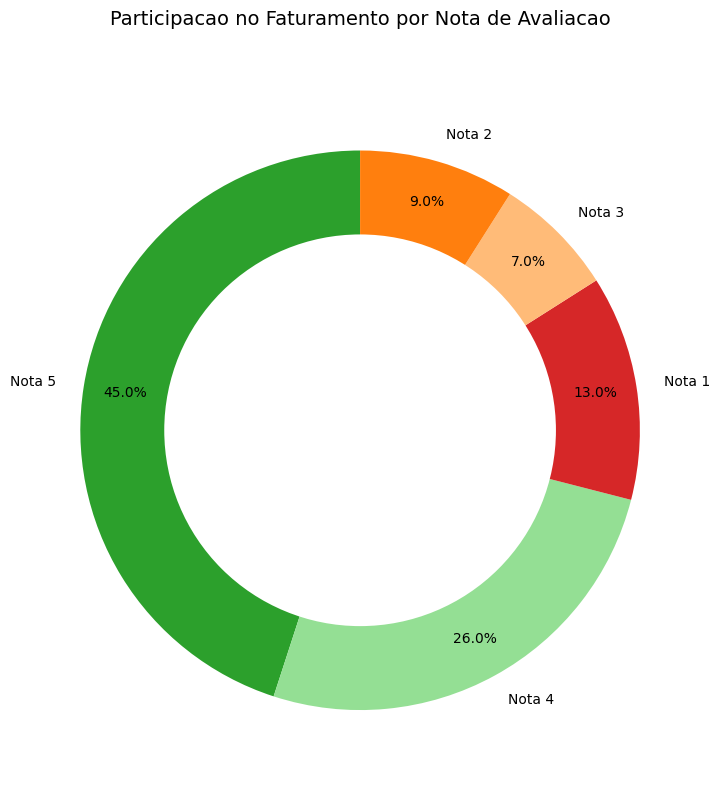

In [12]:
plt.figure(figsize=(8, 8))

labels = ['Nota 5', 'Nota 4', 'Nota 1', 'Nota 3', 'Nota 2']
sizes = [45, 26, 13, 7, 9] 
colors = ['#2ca02c', '#94df94', '#d62728', '#ffbb78', '#ff7f0e']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Participacao no Faturamento por Nota de Avaliacao', fontsize=14, pad=40)

plt.savefig('/home/eduardo/data_science_projects/olist/ecommerce_sales_predictor/plots/grafico_rosca_faturamento.png', 
            dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

Demonstracao Matematica de Estabilidade de Qualidade:
                       mean       std  median
periodo_analise                              
Estagnacao (2018)  4.074919  1.365025     5.0
Expansao (2017)    4.115934  1.313137     5.0


/tmp/ipykernel_51384/601700563.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['periodo_analise'] != 'Outro'], x='periodo_analise', y='review_score', palette='Set2')


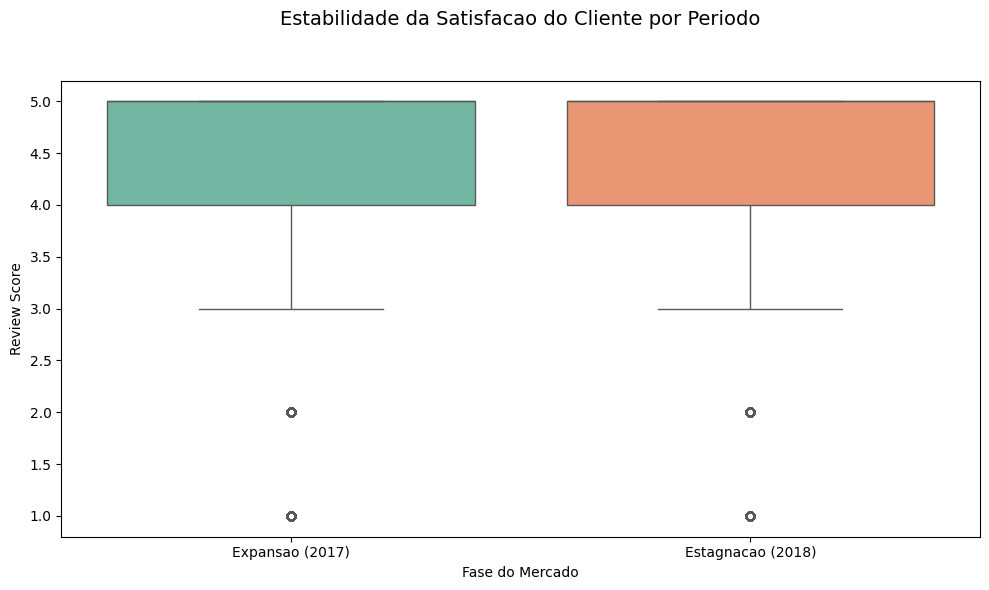

In [11]:
# Comparativo de Estabilidade de Qualidade (Expansao vs Estagnacao)
resumo_estabilidade = df[df['periodo_analise'] != 'Outro'].groupby('periodo_analise')['review_score'].agg(['mean', 'std', 'median'])

print("Demonstracao Matematica de Estabilidade de Qualidade:")
print(resumo_estabilidade)

# Visualizacao em Boxplot para provar que a distribuicao eh identica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['periodo_analise'] != 'Outro'], x='periodo_analise', y='review_score', palette='Set2')

plt.title('Estabilidade da Satisfacao do Cliente por Periodo', fontsize=14, pad=40)
plt.ylabel('Review Score')
plt.xlabel('Fase do Mercado')
plt.tight_layout()

plot_path = "/home/eduardo/data_science_projects/olist/ecommerce_sales_predictor/plots"
plt.savefig(f"{plot_path}/boxplot_estabilidade_notas.png")

# Conclusões / Insights:

- Saúde da Operação: Com as Notas 4 e 5 dominando 70% do faturamento, fica provado que o faturamento não é dependente de vendas "enganosas" de baixa qualidade, mas sim de uma experiência majoritariamente positiva.

- O fato de a Nota 1 possuir o maior Ticket Médio (R$ 127) sugere que existe uma correlação entre o valor investido e a frustração do cliente. Clientes que compram produtos mais caros tendem a ser mais exigentes. Quando a expectativa não é atendida em um item de alto valor, a punição na avaliação é mais severa.

- Zona de Risco (Notas 2 e 3): Estas notas possuem o menor ticket médio (R$ 110 - R$ 115). Isso pode indicar produtos de "commodity" ou baixo custo que, embora não sejam desastrosos (Nota 1), não conseguem encantar o cliente.

- Ao comparar os dois períodos críticos do dataset, observou-se uma estabilidade notável na percepção de qualidade. Enquanto o faturamento e o volume de pedidos atingiram um platô em 2018, a média das avaliações permaneceu praticamente inalterada: 4,11 na fase de expansão contra 4,07 na fase de estagnação.

# Próximos Passos

Esta consistência de 98,8% na nota média indica que a infraestrutura logística e o suporte ao cliente da Olist conseguiram escalar sem perder a qualidade. Portanto, o "teto" atingido em 2018 não é um reflexo de insatisfação do consumidor, mas sim de um amadurecimento natural do mercado ou da saturação do alcance orgânico da plataforma.

Q3 - Análise de Retenção e Lifetime Value (LTV): O objetivo é identificar se o "teto" de 2018 é apenas de novos usuários ou se os clientes antigos também pararam de comprar.
Análise: Taxa de recompra por categoria e o tempo médio entre o primeiro e o segundo pedido.

Q4 - Saturação Geográfica e Logística Regional: Descobrir se o platô é geográfico e se o custo do frete nessas regiões subiu a ponto de impedir a expansão em 2018.
Análise: Cruzar o volume de vendas com dados de população por estado para calcular a penetração de mercado.

Q5 - Sensibilidade Logística e Satisfação: Como o desvio entre a data estimada de entrega e a entrega real impacta a nota de avaliação, e essa sensibilidade do consumidor aumentou durante o período de estagnação de 2018?